In [1]:
import os 
import pandas as pd
import numpy as np

###### Lets import important module and add in working location as usual.  Here we will use the dataframe that I previously processed in Step1
Here I removed some of the columns that I probably won't be using

In [2]:
os.getcwd()
one_level_up = os.path.dirname(os.getcwd())
df = pd.read_csv(one_level_up + '\\data\\processed\\processed_tweets.csv', index_col=0)
df = df.drop(['tweet','punct','token'], axis  = 1)
df

,politican,party,retweet,tweet_web_r,ARI,DCR,TS,lem_token
0,Trump,R,False,Will be interviewed by @seanhannity tonight at...,10.9,6.86,6.86,"['Will', 'interviewed', 'seanhannity', 'tonigh..."
1,Trump,R,False,WELCOME BACK BASEBALL!,11.5,0.15,0.15,"['WELCOME', 'BACK', 'BASEBALL']"
2,Trump,R,False,White House Press Conference at 5:15 P.M. Live!,6.1,6.01,6.01,"['White', 'House', 'Press', 'Conference', '515..."
3,Trump,R,False,The Suburban Housewives of America must read t...,9.0,6.71,6.71,"['The', 'Suburban', 'Housewives', 'America', '..."
4,Trump,R,False,"Obama, who wouldn’t even endorse Biden until e...",10.6,8.44,8.44,"['Obama', 'wouldnt', 'even', 'endorse', 'Biden..."
...,...,...,...,...,...,...,...,...
1069,Pence,R,False,HUGE news: The NASDAQ hit an all-time record h...,11.8,6.88,6.88,"['HUGE', 'news', 'The', 'NASDAQ', 'hit', 'allt..."
1070,Pence,R,False,TONIGHT at 5PM: Joining @LouDobbs to talk abou...,14.1,8.73,8.73,"['TONIGHT', '5PM', 'Joining', 'LouDobbs', 'tal..."
1071,Pence,R,False,Proud to work hand-in-hand with @CDCgov &amp; ...,16.6,9.79,9.79,"['Proud', 'work', 'handinhand', 'CDCgov', 'amp..."
1072,Pence,R,False,Insightful and thoughtful meeting with @theang...,22.9,12.23,12.23,"['Insightful', 'thoughtful', 'meeting', 'thean..."


###### Ok Now we have the data frame.  Let see if we can run some sentiment code and evalute the sentiment of the tweets

In [3]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['tweet_web_r'].apply(analyser.polarity_scores)
compound_score = []
sentiment_score = list(df['sentiment_score'])

for i in range(len(df['sentiment_score'])):
    compound_score.append(sentiment_score[i]['compound'])
    
df['sentiment_score'] = compound_score
df

,politican,party,retweet,tweet_web_r,ARI,DCR,TS,lem_token,sentiment_score
0,Trump,R,False,Will be interviewed by @seanhannity tonight at...,10.9,6.86,6.86,"['Will', 'interviewed', 'seanhannity', 'tonigh...",0.6219
1,Trump,R,False,WELCOME BACK BASEBALL!,11.5,0.15,0.15,"['WELCOME', 'BACK', 'BASEBALL']",0.5093
2,Trump,R,False,White House Press Conference at 5:15 P.M. Live!,6.1,6.01,6.01,"['White', 'House', 'Press', 'Conference', '515...",0.0000
3,Trump,R,False,The Suburban Housewives of America must read t...,9.0,6.71,6.71,"['The', 'Suburban', 'Housewives', 'America', '...",-0.5423
4,Trump,R,False,"Obama, who wouldn’t even endorse Biden until e...",10.6,8.44,8.44,"['Obama', 'wouldnt', 'even', 'endorse', 'Biden...",0.3182
...,...,...,...,...,...,...,...,...,...
1069,Pence,R,False,HUGE news: The NASDAQ hit an all-time record h...,11.8,6.88,6.88,"['HUGE', 'news', 'The', 'NASDAQ', 'hit', 'allt...",0.5147
1070,Pence,R,False,TONIGHT at 5PM: Joining @LouDobbs to talk abou...,14.1,8.73,8.73,"['TONIGHT', '5PM', 'Joining', 'LouDobbs', 'tal...",0.4019
1071,Pence,R,False,Proud to work hand-in-hand with @CDCgov &amp; ...,16.6,9.79,9.79,"['Proud', 'work', 'handinhand', 'CDCgov', 'amp...",0.4767
1072,Pence,R,False,Insightful and thoughtful meeting with @theang...,22.9,12.23,12.23,"['Insightful', 'thoughtful', 'meeting', 'thean...",0.3818


The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

<br>positive sentiment : (compound score >= 0.05)
<br>neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
<br>negative sentiment : (compound score <= -0.05)

<br>Now we have positive negative and neutral let see if we can see the trend on different politician

In [4]:
def sentiment_grouping(sentiment_compound):
    if sentiment_compound >= 0.05:
        return 'Positive'
    elif (sentiment_compound > -0.05 and sentiment_compound < 0.05):
        return 'Neutral'
    elif sentiment_compound <= -0.05:
        return 'Negative'

df['sentiment'] = df['sentiment_score'].apply(sentiment_grouping)
df.groupby(['politican', 'sentiment']).count()['party']

politican  sentiment
Biden      Negative      59
           Neutral       47
           Positive      89
Cruz       Negative      56
           Neutral       39
           Positive      69
McConell   Negative      61
           Neutral       31
           Positive     101
Pence      Negative       9
           Neutral       41
           Positive      91
Sanders    Negative      57
           Neutral       23
           Positive      93
Trump      Negative      10
           Neutral        7
           Positive      32
Warren     Negative      72
           Neutral       36
           Positive      51
Name: party, dtype: int64

Ok we see that most of the people tweets are positive except for Warren who has more negative than positive tweets, also i remove a lot of retweet from donald trump...  perhaps we shouldn't remove retweet or perhaps we need to get more data

######  Ok i just realized the since i import and export we turn token into string now we have to convert it back to list.  In addition we also turn the word to lower to help us out

In [5]:
import string
import re

pattern = r"[{}]".format(string.punctuation)
#final_df.tweet_web_r.str.replace(pattern, '')
df['lem_token'] = df['lem_token'].str.lower()
df['lem_token'] = df['lem_token'].str.replace(pattern,'')
#df['lem_token'].str.split(" ")
df['lem_token'] = df['lem_token'].str.split(" ")
df

,politican,party,retweet,tweet_web_r,ARI,DCR,TS,lem_token,sentiment_score,sentiment
0,Trump,R,False,Will be interviewed by @seanhannity tonight at...,10.9,6.86,6.86,"[will, interviewed, seanhannity, tonight, 900,...",0.6219,Positive
1,Trump,R,False,WELCOME BACK BASEBALL!,11.5,0.15,0.15,"[welcome, back, baseball]",0.5093,Positive
2,Trump,R,False,White House Press Conference at 5:15 P.M. Live!,6.1,6.01,6.01,"[white, house, press, conference, 515, pm, live]",0.0000,Neutral
3,Trump,R,False,The Suburban Housewives of America must read t...,9.0,6.71,6.71,"[the, suburban, housewives, america, must, rea...",-0.5423,Negative
4,Trump,R,False,"Obama, who wouldn’t even endorse Biden until e...",10.6,8.44,8.44,"[obama, wouldnt, even, endorse, biden, everyon...",0.3182,Positive
...,...,...,...,...,...,...,...,...,...,...
1069,Pence,R,False,HUGE news: The NASDAQ hit an all-time record h...,11.8,6.88,6.88,"[huge, news, the, nasdaq, hit, alltime, record...",0.5147,Positive
1070,Pence,R,False,TONIGHT at 5PM: Joining @LouDobbs to talk abou...,14.1,8.73,8.73,"[tonight, 5pm, joining, loudobbs, talk, admini...",0.4019,Positive
1071,Pence,R,False,Proud to work hand-in-hand with @CDCgov &amp; ...,16.6,9.79,9.79,"[proud, work, handinhand, cdcgov, amp, secreta...",0.4767,Positive
1072,Pence,R,False,Insightful and thoughtful meeting with @theang...,22.9,12.23,12.23,"[insightful, thoughtful, meeting, theangiestan...",0.3818,Positive


I am going to redo the stop word once again because the lower case issue

In [6]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

df['lem_token'] = df.lem_token.apply(lambda tokens: [w for w in tokens if not w in stop_words])
df

,politican,party,retweet,tweet_web_r,ARI,DCR,TS,lem_token,sentiment_score,sentiment
0,Trump,R,False,Will be interviewed by @seanhannity tonight at...,10.9,6.86,6.86,"[interviewed, seanhannity, tonight, 900, pm, f...",0.6219,Positive
1,Trump,R,False,WELCOME BACK BASEBALL!,11.5,0.15,0.15,"[welcome, back, baseball]",0.5093,Positive
2,Trump,R,False,White House Press Conference at 5:15 P.M. Live!,6.1,6.01,6.01,"[white, house, press, conference, 515, pm, live]",0.0000,Neutral
3,Trump,R,False,The Suburban Housewives of America must read t...,9.0,6.71,6.71,"[suburban, housewives, america, must, read, ar...",-0.5423,Negative
4,Trump,R,False,"Obama, who wouldn’t even endorse Biden until e...",10.6,8.44,8.44,"[obama, wouldnt, even, endorse, biden, everyon...",0.3182,Positive
...,...,...,...,...,...,...,...,...,...,...
1069,Pence,R,False,HUGE news: The NASDAQ hit an all-time record h...,11.8,6.88,6.88,"[huge, news, nasdaq, hit, alltime, record, hig...",0.5147,Positive
1070,Pence,R,False,TONIGHT at 5PM: Joining @LouDobbs to talk abou...,14.1,8.73,8.73,"[tonight, 5pm, joining, loudobbs, talk, admini...",0.4019,Positive
1071,Pence,R,False,Proud to work hand-in-hand with @CDCgov &amp; ...,16.6,9.79,9.79,"[proud, work, handinhand, cdcgov, amp, secreta...",0.4767,Positive
1072,Pence,R,False,Insightful and thoughtful meeting with @theang...,22.9,12.23,12.23,"[insightful, thoughtful, meeting, theangiestan...",0.3818,Positive


In [14]:
import collections

politican = ['Trump','Biden','Sanders','Warren','McConell','Cruz','Pence']
### over we found out that Pence doesn't actually tweet.  All he does is retweet himself.... so we actually 
### collect data from wrong twitter account

#politican.remove('Pence')

"""
plot = []
for idx, name in enumerate(politican):
    politican_df = df_noRT[df_noRT['politican'] == name] 
    politican_df_tweet = " ".join(review for review in politican_df.tweet_web_r)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(politican_df_tweet)
    plot.append(wordcloud)
"""
politican_top10_BOW = {}
politican_BOW = []
for idx, name in enumerate(politican):
    person_BOW = df[df['politican'] == name].lem_token.sum()
    person_BOW = collections.Counter(person_BOW).most_common(20)
    person_BOW = [x[0] for x in person_BOW]
    politican_top10_BOW[name] =  person_BOW
    politican_BOW.append(person_BOW)
politican_top10_BOW
politican_BOW = [word for words_list in politican_BOW for word in words_list]
politican_BOW

['great',
 'biden',
 'abolish',
 'want',
 'radical',
 'left',
 'news',
 'thank',
 'foxnews',
 'even',
 'tax',
 'bad',
 'john',
 'country',
 'never',
 'fake',
 'many',
 'amp',
 'campaign',
 'trump',
 'president',
 'trump',
 'donald',
 '—',
 'need',
 'american',
 'day',
 'every',
 'care',
 'health',
 'one',
 'ill',
 'nation',
 'crisis',
 'time',
 'job',
 'cant',
 'make',
 'build',
 'right',
 'today',
 'trump',
 'million',
 'americans',
 'need',
 'pandemic',
 'time',
 'country',
 'people',
 'progressive',
 'must',
 'congratulations',
 'join',
 'change',
 'billion',
 'vote',
 'day',
 'many',
 'winning',
 'new',
 'amp',
 'covid19',
 'trump',
 'im',
 'health',
 'family',
 'pandemic',
 'bill',
 '–',
 'americans',
 'us',
 'president',
 'need',
 'worker',
 'federal',
 'congress',
 'trumps',
 'eviction',
 'get',
 'million',
 'senate',
 'democrats',
 'protection',
 'act',
 'paycheck',
 'program',
 'discus',
 'cares',
 'americans',
 'nation',
 'american',
 'week',
 'coronavirus',
 'house',
 'kentu

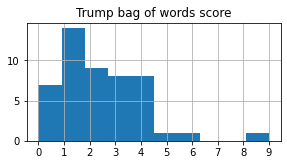

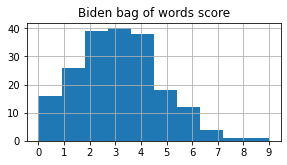

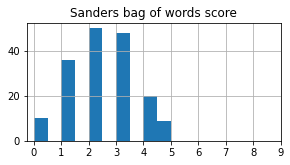

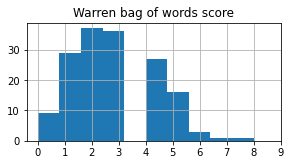

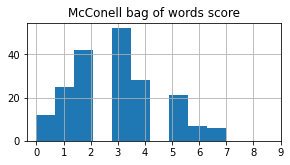

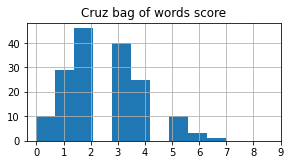

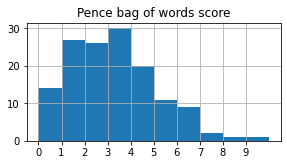

In [85]:
import matplotlib.pyplot as plt
def popular_word_vectorize(token, politican_BOW):
    count = 0 
    for word in token:
        if word in politican_BOW:
            count = count + 1
    return count 
df['BOW_top10_pop_score']= df['lem_token'].apply(lambda token: popular_word_vectorize(token,politican_BOW))

for idx, name in enumerate(politican):
    _= plt.figure(figsize=(10,10))
    _= plt.subplot(4,2,idx+1)
    _= df[df['politican'] == name]['BOW_top10_pop_score'].hist()
    _= plt.title(name + ' bag of words score')
    _= plt.xticks(range(0,10,1))
    